# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [146]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [147]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [148]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
1855,Law Abiding Citizen,2009,Nick Rice,man,3099,0.340737,42.0,85.0,1091
7417,The Hills Have Eyes,2006,Big Bob Carter,man,947,0.075093,49.0,55.0,2542
11228,Troy,2004,Patroclus,man,504,0.014899,20.0,186.0,3605
19601,La Bamba,1987,Ritchie Valens,man,1857,0.272287,25.0,120.0,7521
5662,Cowboys & Aliens,2011,Bronc,man,103,0.007141,NaN,109.0,2063
12203,The Bucket List,2007,Edward,man,4835,0.436372,70.0,118.0,3973
8847,Meet John Doe,1941,Pop Dwyer,man,164,0.005160,66.0,NaN,2884
16901,Battle of the Year,2013,Thomas Hergenro,?,216,0.019626,NaN,9.0,6053
9102,Mulan,1998,Shan-Yu,man,570,0.039539,43.0,224.0,2961
7383,Hesher,2010,Funeral Directo,man,293,0.030613,60.0,NaN,2535


Generate information about all the columns in the data 

In [149]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'proportion_of_dialogue'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'script_id'}>]], dtype=object)

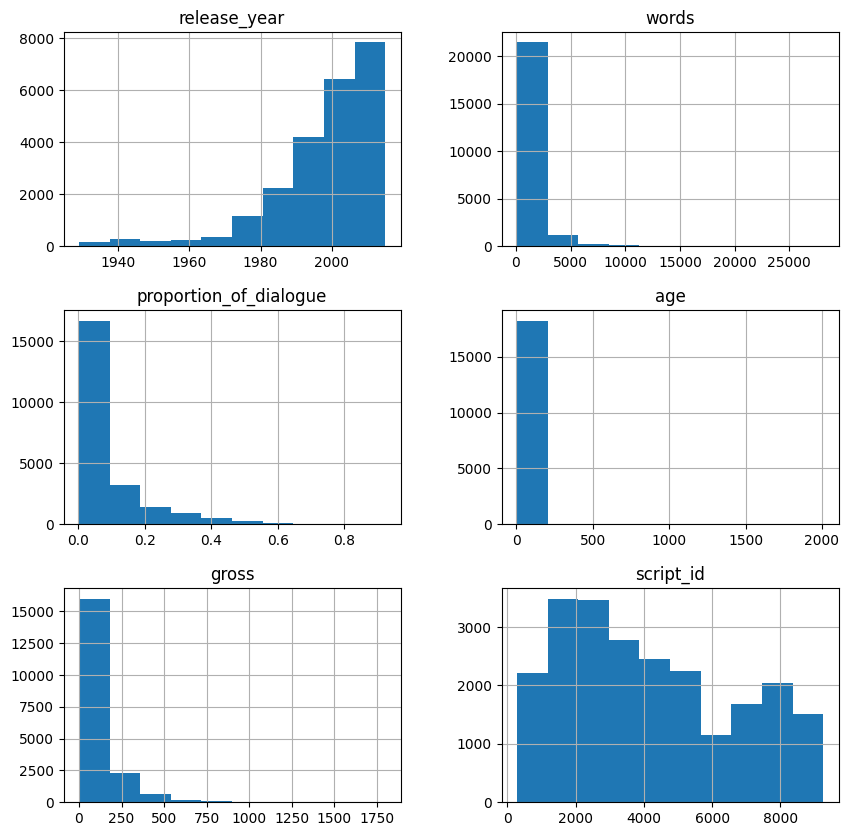

In [150]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [151]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

I notice an outlier in the age column. The max age of a character according to the data is 2009 which is not possible. 

## Drop Rows

In [152]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [153]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [154]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [155]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [156]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [157]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [158]:
film_filter = film_df['title'] == "The Hunger Games"

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [159]:
film_df[film_filter].sort_values(by = 'words', ascending= False)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
20829,The Hunger Games,2012,Katniss Everdee,woman,2605,0.310156,22.0,445.0,8029
20830,The Hunger Games,2012,Peeta Mellark,man,1167,0.138945,20.0,445.0,8029
20828,The Hunger Games,2012,Haymitch Aberna,man,977,0.116323,51.0,445.0,8029
20826,The Hunger Games,2012,Effie Trinket,woman,646,0.076914,38.0,445.0,8029
20825,The Hunger Games,2012,Claudius Temple,man,595,0.070842,45.0,445.0,8029
20822,The Hunger Games,2012,Caesar Flickerm,man,539,0.064174,52.0,445.0,8029
20827,The Hunger Games,2012,Gale Hawthorne,man,436,0.051911,22.0,445.0,8029
20833,The Hunger Games,2012,Seneca Crane,man,430,0.051197,34.0,445.0,8029
20824,The Hunger Games,2012,Cinna,man,332,0.039529,48.0,445.0,8029
20831,The Hunger Games,2012,Primrose Everde,woman,283,0.033694,12.0,445.0,8029


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [160]:
character_filter = film_df['character'] == 'Katniss Everdeen'

In [161]:
film_df[character_filter]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


### ❓ How does this data align with your experience/knowledge of the film?

It does not align since Katniss Everdeen is the main character in this movie and any data is shown when trying to get information about this character. 

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

That since data collection and categorization process is made by human then there will always be errors and the data may be biased in most cases. I would have made sure that every data is correct and if there are errors then I would have fixed them. 

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [162]:
film_df.sort_values(by= 'proportion_of_dialogue', ascending= False).head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7242,Happy Feet,2006,Mumble,man,2677,0.923422,25.0,262.0,2483
16371,The End of the Tour,2015,David Lipsky,man,3117,0.911137,32.0,3.0,5485
21092,Duel,1971,David Mann,man,2660,0.881086,47.0,NaN,8164
3650,127 Hours,2010,Aron Ralston,man,4336,0.842760,32.0,20.0,1520
22236,Alfie,2004,Alfie,man,5852,0.814815,32.0,18.0,8683
21663,Mala Noche,1986,Walt,man,2093,0.810612,NaN,NaN,8423
1019,Duck Soup,1933,Groucho,man,3697,0.730344,NaN,NaN,873
4569,The Battle of Algiers,1966,Col. Mathieu,man,4962,0.723113,44.0,6.0,1780
17750,1408,2007,Mike Enslin,man,2338,0.703581,41.0,91.0,6537
18138,Jumpin' Jack Flash,1986,Terry Dolittle,woman,4722,0.699452,31.0,60.0,6798


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [163]:
film_df.sort_values(by= 'proportion_of_dialogue').head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
5283,Casino,1995,Piscano'S Wife,woman,104,0.001537,NaN,84.0,1963
5272,Casino,1995,Frankie Avalon,man,106,0.001566,56.0,84.0,1963
5291,Casino,1995,Vinny Forlano,man,112,0.001655,NaN,84.0,1963
5262,Casino,1995,Cashier,woman,114,0.001684,NaN,84.0,1963
5277,Casino,1995,La Banker,man,114,0.001684,61.0,84.0,1963
5292,Casino,1995,Winner,man,116,0.001714,NaN,84.0,1963
5286,Casino,1995,Security Guard,man,116,0.001714,55.0,84.0,1963
8031,JFK,1991,Prison Guard,man,106,0.001802,NaN,145.0,2682
5258,Casino,1995,Anna Scott,woman,124,0.001832,NaN,84.0,1963
5257,Casino,1995,Amy Rothstein (,woman,130,0.001921,NaN,84.0,1963


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [164]:
film_df.sort_values(by= 'words').head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
15233,Sweeney Todd: The Demon Barber of Fleet Street,2007,Happy Customer',woman,101,0.011676,NaN,66.0,5083
20449,Lawless,2012,Danny,man,101,0.009168,46.0,40.0,7882
21869,Transcendence,2014,Martin,man,101,0.012063,44.0,24.0,8525
17979,My Best Friend's Birthday,1987,Cute Girl,woman,101,0.010254,NaN,NaN,6625
22909,The Utah Murder Project,2006,Deputy Bracken,man,101,0.008809,45.0,NaN,9214
18487,Inside Man,2006,Miriam Douglas,woman,101,0.008012,NaN,117.0,6968
17857,Searching for Bobby Fischer,1993,Tournament Dire,man,101,0.010766,53.0,15.0,6576
15725,"The Chronicles of Narnia: The Lion, the Witch ...",2005,Maugrim,man,101,0.021734,47.0,396.0,5300
16598,Pok�mon: The First Movie - Mewtwo Strikes Back,1998,Umio,man,101,0.032268,32.0,158.0,5523
1224,Forrest Gump,1994,Abbie Hoffman,man,101,0.011111,34.0,686.0,921


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

I notice here that when the data is sorted in ascending order, there are more female characters. This pattern does not surprise me, since I know that women had not been involved in films much during the years in which the data was taken.

## Groupby

Group by film and then calculate the sum total for every column.

In [165]:
film_df.groupby('title').sum()

,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
title,,,,,,,,
(500) Days of Summer,26117,AlisonAutumn - Girl ACo-Worker 3DoucheManMcken...,womanwomanmanmanmanmanmanmanwomanwomanwomanmanman,18500,1.0,378.0,481.0,19942
10 Things I Hate About You,23988,Bianca StratforCameron JamesChastityDerekJoey ...,womanmanwomanmanmanwomanwomanmanmanmanmanman,19680,1.0,307.0,780.0,18144
12 Years a Slave,56364,Anne NorthupArmsbyBassBrownBurchCelesteChapinC...,womanmanmanmanmanwomanmanmanmanwomanmanmanmanm...,19628,1.0,712.0,1680.0,42476
12 and Holding,30075,Ashley CargesCoach GilmoreDoctorGrace FisherGu...,womanmanmanwomanmanmanmanmanmanmanwomanmanwoma...,15968,1.0,513.0,0.0,22710
127 Hours,8040,Aron RalstonKristiMeganRana,manwomanwomanwoman,5145,1.0,114.0,80.0,6080
...,...,...,...,...,...,...,...,...
Zero Effect,13986,Basketball PlayDaisyDaryl ZeroGloria SullivanG...,manwomanmanwomanmanwomanman,13927,1.0,227.0,21.0,57106
Zerophilia,16040,JanineJeremyKeenanLucaLukeMaxMichelleSydney,womanmanmanwomanmanmanwomanman,16686,1.0,160.0,0.0,30144
Zodiac,62217,Al HymanArthur Leigh AlBelli'S HousekeBob Vaug...,manmanwomanmanmanmanmanwomanwomanwomanmanmanma...,14656,1.0,1071.0,1271.0,201221


Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [166]:
film_df.groupby('title')[['words']].sum()

,words
title,
(500) Days of Summer,18500
10 Things I Hate About You,19680
12 Years a Slave,19628
12 and Holding,15968
127 Hours,5145
...,...
Zero Effect,13927
Zerophilia,16686
Zodiac,14656


Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [167]:
film_df.groupby(['title','gender'])[['words']].sum()

words
title                      gender       
(500) Days of Summer       man     12762
                           woman    5738
10 Things I Hate About You man     10688
                           woman    8992
12 Years a Slave           man     16176
...                                  ...
Zodiac                     woman    1421
eXistenZ                   man      5695
                           woman    3752
xXx                        man      7287
                           woman     998

[3936 rows x 1 columns]

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [168]:
women_filter = film_df['gender'] == 'woman'

In [169]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [170]:
men_filter = film_df['gender'] == 'man'

In [171]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [172]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [173]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [174]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [175]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [176]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [177]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
Clerks                    24428
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

I notice that even among the top 20 movies where there are more words said by women, they contain almost half as many words as the top 20 movies where there are more words said by men. This surprises me in a certain way since I didn't know that there was such a difference in words even in movies where women are the protagonists as in the case of Sex and the City.

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<Axes: title={'center': 'Top 20 Women'}, xlabel='title'>

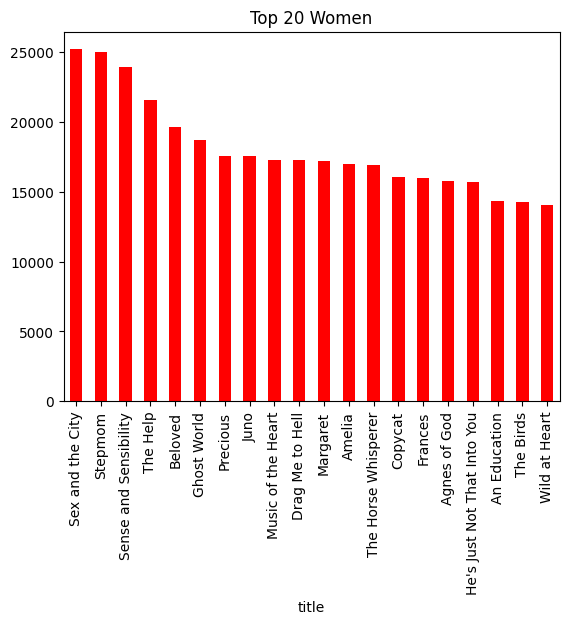

In [178]:
top20_women.plot(
    kind='bar',
    title= 'Top 20 Women',
    color= 'red'
)

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

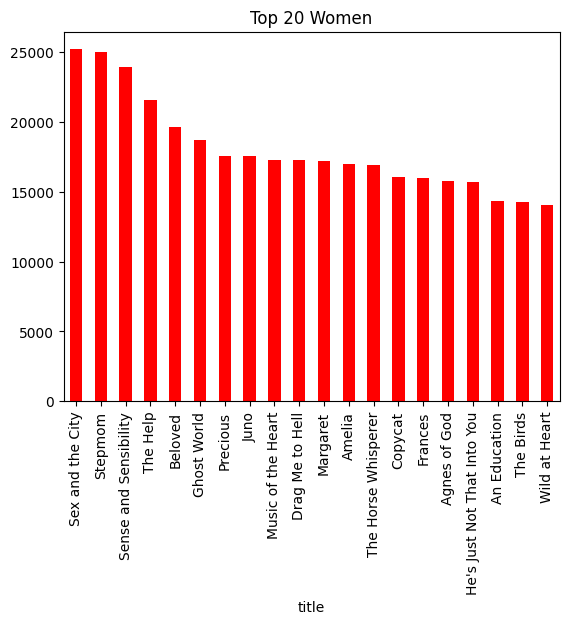

In [179]:
ax = top20_women.plot(
    kind='bar',
    title= 'Top 20 Women',
    color= 'red'
)
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

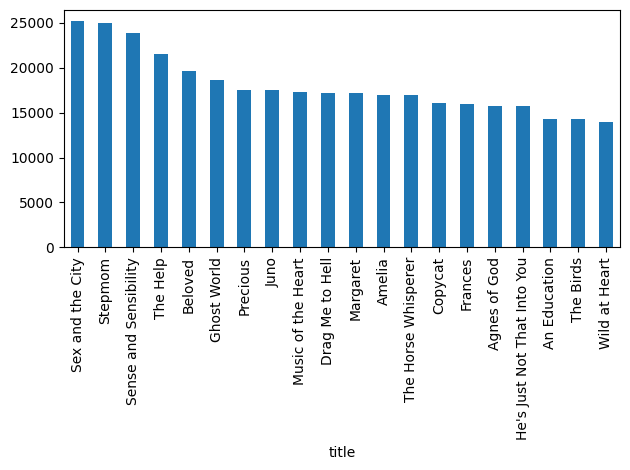

In [180]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [181]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [182]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [183]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<Axes: xlabel='age', ylabel='words'>

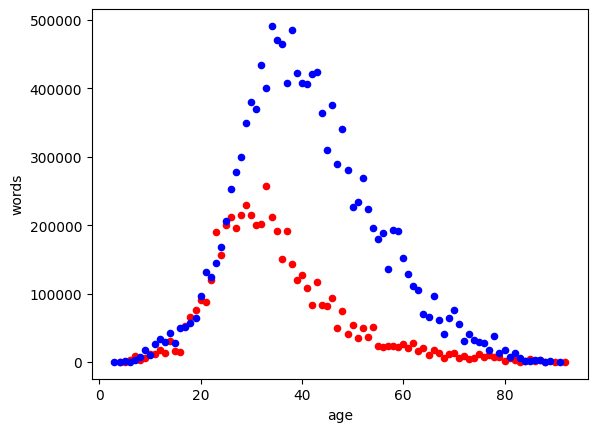

In [184]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<Axes: xlabel='age'>

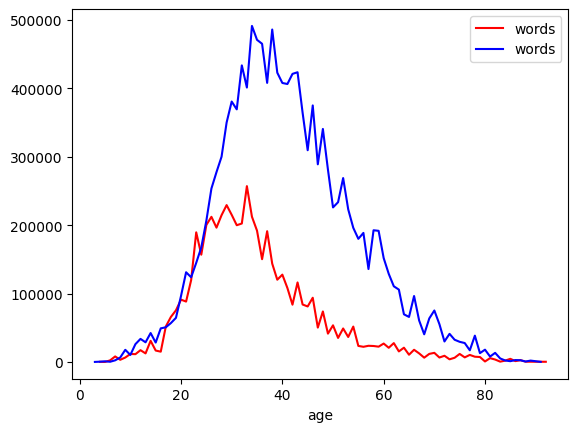

In [185]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue')

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?

I like EDA techniques. They make data more "readable" and easier to handle. Data is often presented in raw form, making it almost impossible to analyze and read as it most likely contains a large amount of information and is not well organized. Also, I like how EDA techniques allow to narrow data down in order to analyze the data better by adding some filters and sorting depending on the need. Furthermore, I find EDA techniques very useful, as they make it easier to identify errors and can transform data into graphs, making them very understandable. Overall, when it comes to data, EDA techniques are very helpful to read, analyze, and fix different datasets. 

### 2. What were some of the hurdles that you encountered moving through the EDA process?

In moving through the EDA process, I have not encountered any major obstacles. I went through the EDA process without problems. However, I can consider the different types of functions and their structures as obstacles, since I have never used them before. I find them a little difficult to remember and write correctly. I made some mistakes when writing some functions and their arguments. I missed a single letter, the data changed very noticeably.

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

I chose some of the variables and questions to follow because women have been marginalized and discriminated against in the film industry for many years and I wanted to show that fact by choosing the right variables and questions. Thus, this data will "speak" louder.

I would like to explore issues related to race and gender in sports. I feel like athletes in different sports are often conditioned by their race and gender. Most women or almost all women who play sports have a much lower salary than men in the same sport. Additionally, athletes who tend to be of a whiter race are often considered to belong to better brands or clubs. That is why I would like to explore these questions next.